In [1]:
# Sales Prediction using Multiple Regression Models (Upgraded for 1st Prize)

# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [2]:

#  Load the Dataset
df = pd.read_csv("Advertising.csv")

#  Initial Exploration
print("Data Preview:")
print(df.head())


Data Preview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
print("Null Check:")
print(df.isnull().sum())


Null Check:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [4]:

# Preprocessing
df.drop(columns=["Unnamed: 0"], inplace=True)


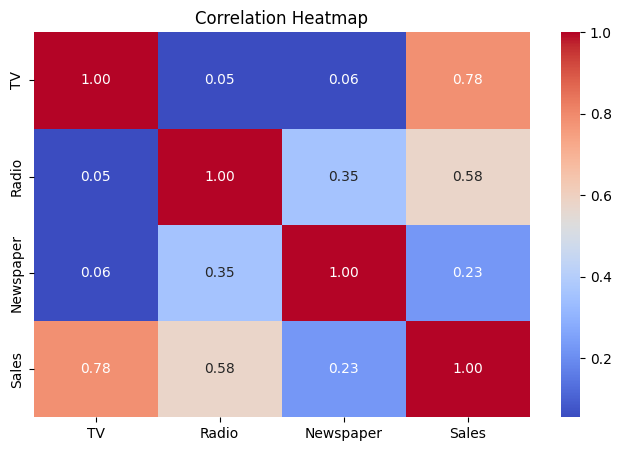

In [5]:

#  Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [6]:

#  Define Features and Target
X = df.drop("Sales", axis=1)
y = df["Sales"]


In [7]:

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

# 📌 Models to Train
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}


In [9]:

#  Train and Evaluate All Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = (r2, rmse)
    print(f"\n{name}:")
    print(f"✅ R² Score: {r2:.3f}")
    print(f"✅ RMSE: {rmse:.3f}")
    



Linear Regression:
✅ R² Score: 0.899
✅ RMSE: 1.782

Ridge Regression:
✅ R² Score: 0.899
✅ RMSE: 1.782

Lasso Regression:
✅ R² Score: 0.900
✅ RMSE: 1.781


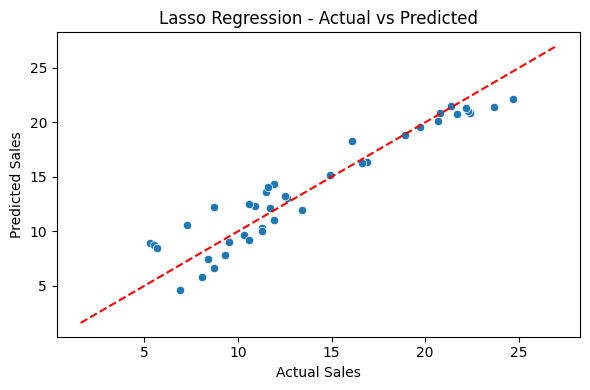

In [11]:
    #  Actual vs Predicted Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{name} - Actual vs Predicted")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
    plt.tight_layout()
    plt.show()
    


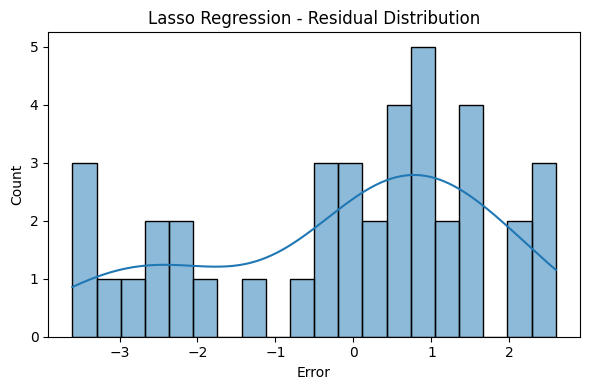

In [12]:
    #  Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=20)
    plt.title(f"{name} - Residual Distribution")
    plt.xlabel("Error")
    plt.tight_layout()
    plt.show()


In [13]:

#  Model Comparison Summary
print("\n Final Model Comparison:")
for name, (r2, rmse) in results.items():
    print(f"{name:20s} → R²: {r2:.3f} | RMSE: {rmse:.3f}")


 Final Model Comparison:
Linear Regression    → R²: 0.899 | RMSE: 1.782
Ridge Regression     → R²: 0.899 | RMSE: 1.782
Lasso Regression     → R²: 0.900 | RMSE: 1.781
